# How well do jobs and skills pay for Data Analysts?
* Methology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [19]:
#importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns
#loading dataset 
ds=load_dataset('lukebarousse/data_jobs')
df=ds['train'].to_pandas()
#converting job_posted_date to datetime format(data cleaning step)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else  x)

In [20]:
df_us=df[df['job_country']=='United States'].dropna(subset=['salary_year_avg']).copy()

In [21]:
job_titles = df_us['job_title'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst']

In [22]:
df_us_top6=df_us[df_us['job_title_short'].isin(job_titles)]

In [23]:
job_order=df_us_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index


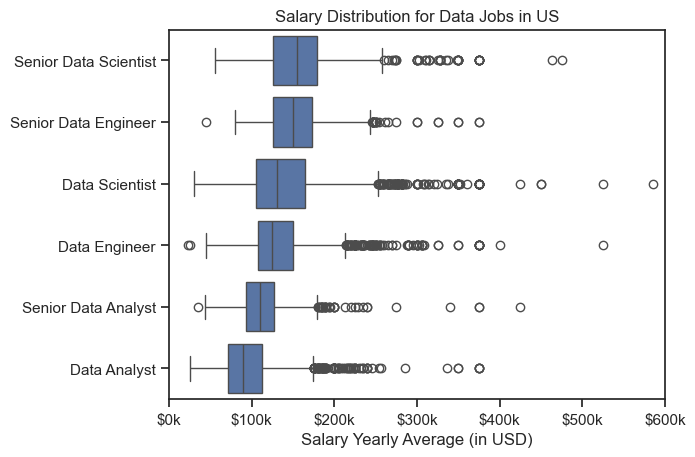

In [24]:
sns.boxplot(data=df_us_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style="ticks")
#plt.boxplot(job_list, labels=job_titles,vert=False)
plt.title('Salary Distribution for Data Jobs in US')
plt.xlabel('Salary Yearly Average (in USD)')
plt.ylabel('')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}k'))
plt.xlim(0, 600000)
plt.show()

# Investigate median salary vs  skills for Data Analysts

In [25]:
df_da_us=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

In [26]:
df_da_us=df_da_us.explode('job_skills')

In [32]:
df_us_top_pay=df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median', ascending=False).head(10)
df_us_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [31]:
df_us_skills=df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False).head(10)
df_us_skills

,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


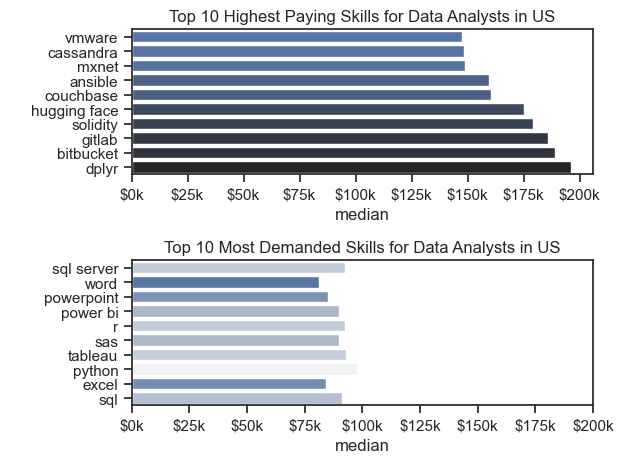

In [33]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')
sns.barplot(data=df_us_top_pay, x='median', y=df_us_top_pay.index, ax=ax[0], palette='dark:b_r',hue='median', legend=False) 
#df_us_pay.plot(kind='barh', y='median', ax=ax[0],legend=False)
ax[0].invert_yaxis()
ax[0].set_ylabel(' ')
ax[0].set_title('Top 10 Highest Paying Skills for Data Analysts in US')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}k'))
sns.barplot(data=df_us_skills, x='median', y=df_us_skills.index, ax=ax[1], palette='light:b_r',hue='median', legend=False)
#df_us_skill.plot(kind='barh', y='median', ax=ax[1],legend=False)
ax[1].invert_yaxis()
ax[1].set_ylabel(' ')
ax[1].set_title('Top 10 Most Demanded Skills for Data Analysts in US')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}k'))
ax[1].set_xlim(0,200000)

fig.tight_layout()